In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from skimage.io import imread

<p style = "font-size: 13px; text-align: right; color: cadetblue" > August 2024, written by Irina Nedyalkova

<p style = "font-size: 27px; text-align: center; color: cadetblue" > Weather Data

This work should have been my Date and Time practice but the Wind data catched my eye. Probably, not a surprise, wind is my favourite natural phenomenon. We can not see wind, just the things it moves. 

In [4]:
WEATHER_DATA = pd.read_csv("weather_data.csv")

In [5]:
WEATHER_DATA.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

- First, I take a look at the data.
- Second, I wrap it in a global variable (capital letters).
- Third, I see what columns do we have...
- For this project, I decide to drop some of the columns and work with just 4 of them.

In [6]:
df_weather = WEATHER_DATA.drop(axis = 1, columns = ["Dew Point Temp_C", "Rel Hum_%", "Visibility_km", "Press_kPa"]) 

I make a new dataframe. Here comes the importance of the global variable. Always know which your original dataframe is!

In [7]:
date_time = df_weather["Date/Time"]                                       # original Date/Time column

df_DT = pd.DataFrame(date_time)

I prefer to have clarity and take out just the column I want to split, the "Date/Time" column. 

In [8]:
date = pd.to_datetime(df_DT["Date/Time"]).dt.date                      # split to Date column

just_dates = pd.DataFrame(date)                                     

In [9]:
time = pd.to_datetime(df_DT["Date/Time"]).dt.time                    # split to Time column

just_time = pd.DataFrame(time)                                     

I keep the variables closed, because GitHub shows them in Large, and the data takes up too much space.

In [10]:
date_column = just_dates.rename(columns = {"Date/Time": "Date"})

In [11]:
time_column = just_time.rename(columns = {"Date/Time": "Time"})

Above, renamed the columns just as $Date$ and $Time$.

In [12]:
working_df = df_weather.drop(axis = 1, columns = "Date/Time")

I create, check for accuracy and wrap the data in a variable then.

In [13]:
working_df.insert(0, "Date", value = date_column)
working_df.insert(1, "Time", value = time_column)

<p style = "font-size: 17px; text-align: center" > My new DataFrame, which I will be working with, is ready! It has 5 columns and 8784 rows.

In [14]:
#working_df                   # I don't open too large variables in GitHub

In [15]:
working_df.columns

Index(['Date', 'Time', 'Temp_C', 'Wind Speed_km/h', 'Weather'], dtype='object')

In [16]:
working_df.nsmallest(11, "Temp_C")                             # finding the lowest temperatures

,Date,Time,Temp_C,Wind Speed_km/h,Weather
344,2012-01-15,08:00:00,-23.3,7,Clear
342,2012-01-15,06:00:00,-23.2,7,Mostly Cloudy
343,2012-01-15,07:00:00,-22.8,9,Mainly Clear
345,2012-01-15,09:00:00,-22.2,9,Mainly Clear
338,2012-01-15,02:00:00,-21.4,9,Cloudy
341,2012-01-15,05:00:00,-21.3,6,Mostly Cloudy
336,2012-01-15,00:00:00,-21.2,11,Cloudy
337,2012-01-15,01:00:00,-21.1,9,Cloudy
340,2012-01-15,04:00:00,-21.0,0,Cloudy
339,2012-01-15,03:00:00,-20.7,4,Cloudy


In [17]:
lowest_temp_df = working_df.nsmallest(11, "Temp_C")

In [18]:
lowest_temp_df.shape

(11, 5)

In [19]:
lowest_temp_wind = lowest_temp_df["Wind Speed_km/h"]

In [20]:
temp_at_lowest = lowest_temp_df["Temp_C"]

The lowest temperature is on 15.01.2012 with $11$ entries. Below, you see the visual presentation:

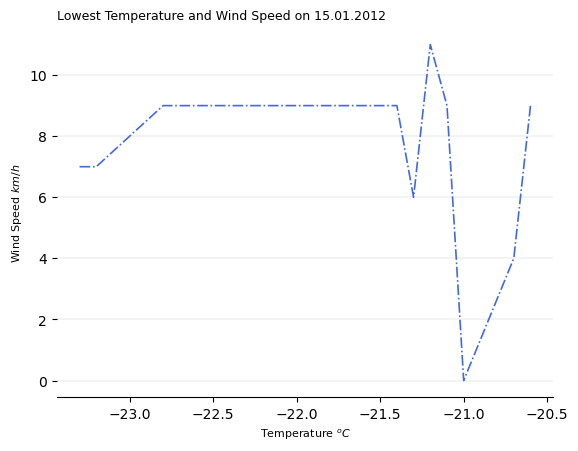

In [21]:
fig, ax = plt.subplots()

ax.plot(temp_at_lowest, lowest_temp_wind, linestyle = "dashdot", lw = 1.2, color = "royalblue")

# hide some axes lines
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# showing ticks
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

# horozontal grid
ax.yaxis.grid(lw = 0.2) 

# labels
ax.set_xlabel("Temperature $^{o}C$", size = 8)
ax.set_ylabel("Wind Speed $km/h$", size = 8)
ax.set_title("Lowest Temperature and Wind Speed on 15.01.2012", size = 9, loc = "left")

# show
plt.show()

Wind is a vector quantity. It has a magnitude (wind_speed) and a direction (wind_direction). These data contains only the magnitude in scalar values.

> On 15.01.2012 we have wind speed in range $0-11$ km/h:

In [22]:
df_wind_description_S = pd.DataFrame({"specifications": ["sea like a mirror", "sea shaken into waves", "we feel on face"],
                                    "wind_speed": ["0 - 1", "1 - 5", "6 - 11"],
                                    "description": ["calm", "light air", "light breeze"]})

In [23]:
df_wind_description_S.style.hide()    # hides index column

specifications,wind_speed,description
sea like a mirror,0 - 1,calm
sea shaken into waves,1 - 5,light air
we feel on face,6 - 11,light breeze


Now to explore how the wind behaves in the highest temperature...

In [24]:
working_df[(working_df["Temp_C"] >= 30)].shape

(68, 5)

There are $68$ entries for temperature above 30$^{o}C$ on different days.

In [25]:
df68_heat = working_df[(working_df["Temp_C"] >= 30)]

In [26]:
heat_temp = df68_heat["Temp_C"]

Checking min / max and mean:

In [27]:
[heat_temp.min(), heat_temp.max(), heat_temp.mean()]     # grad C

[30.0, 33.0, 31.217647058823527]

In [28]:
heat_wind = df68_heat["Wind Speed_km/h"]

Checking min / max and mean value of the wind during the most high temperatures:

In [29]:
[heat_wind.min(), heat_wind.max(), heat_wind.mean()]        # km/h

[4, 32, 18.0]

Here the visual presentation with 68 values above 30$^{o}C$:

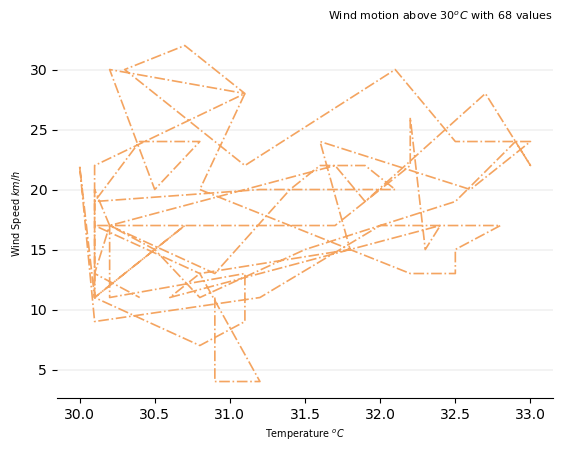

In [30]:
fig, ax = plt.subplots()

ax.plot(heat_temp, heat_wind, linestyle = "dashdot", lw = 1.2, color = "sandybrown")

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
ax.yaxis.grid(lw = 0.2) 

ax.set_xlabel("Temperature $^{o}C$", size = 7)
ax.set_ylabel("Wind Speed $km/h$", size = 7)
ax.set_title("Wind motion above 30$^{o}C$ with 68 values", size = 8, loc = "right")

plt.show()

> Uh! A lot is going on here :) Let's zoom in and test with less values:

In [31]:
working_df[(working_df["Temp_C"] >= 31)].shape

(35, 5)

Above 31$^{o}C$ we have 35 entries. I would like to compare with the same shape as the cold chart.

In [32]:
working_df[(working_df["Temp_C"] >= 32.4)].shape

(11, 5)

Here we go! Above 32.4$^{o}C$ there are exactly 11 entries I need for the hot/cold comparison.

In [33]:
df_heat_temp11 = working_df[(working_df["Temp_C"] >= 32.4)]

In [34]:
df_heat_temp11

,Date,Time,Temp_C,Wind Speed_km/h,Weather
4122,2012-06-20,18:00:00,32.4,17,Mostly Cloudy
4142,2012-06-21,14:00:00,32.6,20,Mainly Clear
4143,2012-06-21,15:00:00,33.0,24,Mainly Clear
4144,2012-06-21,16:00:00,32.5,24,Mainly Clear
4694,2012-07-14,14:00:00,32.7,28,Mainly Clear
4695,2012-07-14,15:00:00,33.0,22,Mainly Clear
4696,2012-07-14,16:00:00,32.9,24,Mainly Clear
4697,2012-07-14,17:00:00,32.5,19,Mainly Clear
5199,2012-08-04,15:00:00,32.8,17,Clear
5200,2012-08-04,16:00:00,32.5,15,Clear


In [35]:
heat_temp11 = df_heat_temp11["Temp_C"]

In [36]:
heat_wind11 = df_heat_temp11["Wind Speed_km/h"]

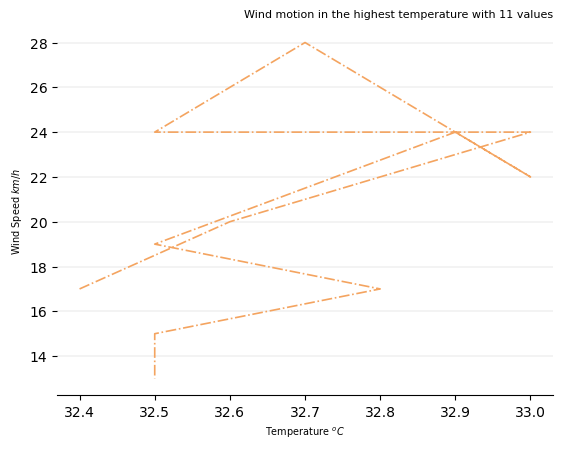

In [37]:
fig, ax = plt.subplots()

ax.plot(heat_temp11, heat_wind11, linestyle = "dashdot", lw = 1.2, color = "sandybrown")

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
ax.yaxis.grid(lw = 0.2)

ax.set_xlabel("Temperature $^{o}C$", size = 7)
ax.set_ylabel("Wind Speed $km/h$", size = 7)
ax.set_title("Wind motion in the highest temperature with 11 values", size = 8, loc = "right")

plt.show()

In [38]:
[heat_temp11.min(), heat_temp11.max()]                  # I always do some check if my chart is correct

[32.4, 33.0]

In [39]:
[heat_wind11.min(), heat_wind11.max()]                 # I always do some check if my chart is correct

[13, 28]

> The wind speed is much more different here, below a guide table:

In [40]:
df_wind_description_M = pd.DataFrame({"specifications": ["tree leaves in constant motion", "raises dust, moves small branches"],
                                        "wind_speed": ["13 - 19", "20 - 28"],
                                       "description": ["gentle breeze", "moderate breeze"]})

In [41]:
df_wind_description_M.style.hide()   # hides index column

specifications,wind_speed,description
tree leaves in constant motion,13 - 19,gentle breeze
"raises dust, moves small branches",20 - 28,moderate breeze


Okay, time to compare:

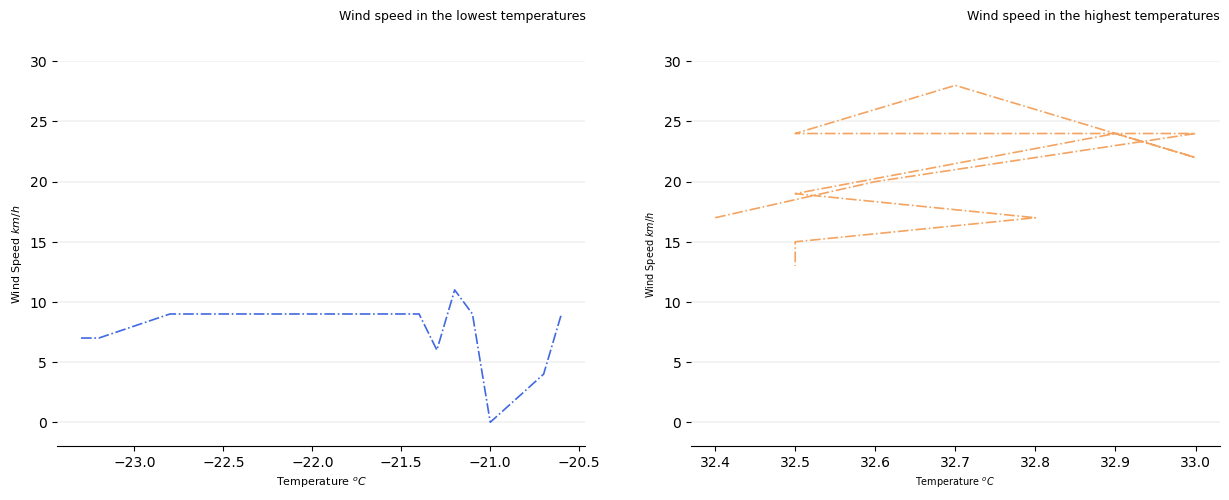

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

ax1.plot(temp_at_lowest, lowest_temp_wind, linestyle = "dashdot", lw = 1.2, color = "royalblue")
ax1.set_ylim(-2, 30)
ax1.yaxis.grid(lw = 0.2)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.xaxis.set_ticks_position("bottom")
ax1.yaxis.set_ticks_position("left")
ax1.set_xlabel("Temperature $^{o}C$", size = 8)
ax1.set_ylabel("Wind Speed $km/h$", size = 8)
ax1.set_title("Wind speed in the lowest temperatures", size = 9, loc = "right", pad = 30)

ax2.plot(heat_temp11, heat_wind11, linestyle = "dashdot", lw = 1.2, color = "sandybrown")
ax2.set_ylim(-2, 30)
ax2.yaxis.grid(lw = 0.2)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.xaxis.set_ticks_position("bottom")
ax2.yaxis.set_ticks_position("left")
ax2.set_xlabel("Temperature $^{o}C$", size = 7)
ax2.set_ylabel("Wind Speed $km/h$", size = 7)
ax2.set_title("Wind speed in the highest temperatures", size = 9, loc = "right", pad = 30)

plt.show()

> The wind guide table all together:

In [43]:
df_wind_description_L = pd.DataFrame({"specifications": ["sea like a mirror", "sea shaken into waves", "we feel on face",
                                                    "tree leaves in constant motion", "raises dust, moves small branches"],
                                          "wind_speed": ["0 - 1", "1 - 5", "6 - 11", "12 - 19", "20 - 28"],
                                "description": ["calm", "light air", "light breeze", "gentle breeze", "moderate breeze"]})

In [44]:
df_wind_description_L.style.hide()

specifications,wind_speed,description
sea like a mirror,0 - 1,calm
sea shaken into waves,1 - 5,light air
we feel on face,6 - 11,light breeze
tree leaves in constant motion,12 - 19,gentle breeze
"raises dust, moves small branches",20 - 28,moderate breeze


In simple terms, wind is the movement of air. This movement is caused by pressure differences, which in turn were caused by temperature differences. It all starts with the sun :) As it gets warmer, the air expands and rises, leaving behind an area of low pressure. Then, the air will move from surrounding higher pressure areas to try even things out and it is this rush of air that results in wind. The bigger the pressure difference, the faster the air moves. But because of earth's rotation, that air does not flow directly from high to low pressure... instead it is deflected to the right.

As I said in the beginning, wind is my favourite natural phenomenon, and the way it moves is amazing! Below, you see a Japanese kanji $Wind$, calligraphed by a Japanese girl. The Japanese language has 3 alphabets (writing systems). Kanji is one of them.

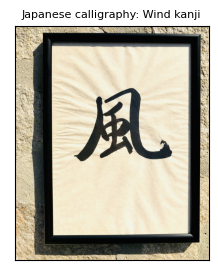

In [45]:
kanji_image = imread("wind_kanji.jpg")
plt.figure(figsize = (2.5, 5))
plt.xticks([])
plt.yticks([])
plt.title("Japanese calligraphy: Wind kanji", size = 8)
plt.imshow(kanji_image)
plt.show()

In Japanese culture the concept of $Wind$ holds a significant place:
- Wind is associated with change and unpredictability.
- The light air and gentle breeze are also seen as symbols of renewal and refreshment. 

<p style = "font-size: 17px; text-align: center" > And what if I decide to sort the same 11 entries by Time?

In [46]:
lowest_temp_df

,Date,Time,Temp_C,Wind Speed_km/h,Weather
344,2012-01-15,08:00:00,-23.3,7,Clear
342,2012-01-15,06:00:00,-23.2,7,Mostly Cloudy
343,2012-01-15,07:00:00,-22.8,9,Mainly Clear
345,2012-01-15,09:00:00,-22.2,9,Mainly Clear
338,2012-01-15,02:00:00,-21.4,9,Cloudy
341,2012-01-15,05:00:00,-21.3,6,Mostly Cloudy
336,2012-01-15,00:00:00,-21.2,11,Cloudy
337,2012-01-15,01:00:00,-21.1,9,Cloudy
340,2012-01-15,04:00:00,-21.0,0,Cloudy
339,2012-01-15,03:00:00,-20.7,4,Cloudy


In the lowest temperature there is just one day (Jan 15, 2012), I sort by $Time$:

In [47]:
lowest_temp_df.sort_values(by = ["Time"])

,Date,Time,Temp_C,Wind Speed_km/h,Weather
336,2012-01-15,00:00:00,-21.2,11,Cloudy
337,2012-01-15,01:00:00,-21.1,9,Cloudy
338,2012-01-15,02:00:00,-21.4,9,Cloudy
339,2012-01-15,03:00:00,-20.7,4,Cloudy
340,2012-01-15,04:00:00,-21.0,0,Cloudy
341,2012-01-15,05:00:00,-21.3,6,Mostly Cloudy
342,2012-01-15,06:00:00,-23.2,7,Mostly Cloudy
343,2012-01-15,07:00:00,-22.8,9,Mainly Clear
344,2012-01-15,08:00:00,-23.3,7,Clear
345,2012-01-15,09:00:00,-22.2,9,Mainly Clear


And let's see how the air moves, we can say, in the night of 15 Jan 2012:

In [48]:
df_lowest_temp_sorted_by_time = lowest_temp_df.sort_values(by = ["Time"])

In [49]:
temp_lowest_sorted = df_lowest_temp_sorted_by_time["Temp_C"]

In [50]:
lowest_temp_wind_sorted = df_lowest_temp_sorted_by_time["Wind Speed_km/h"]

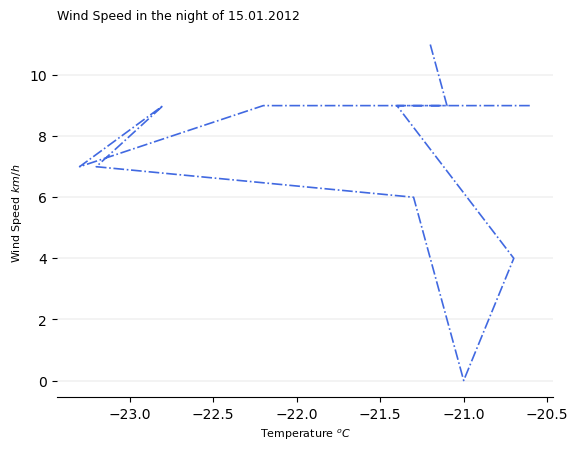

In [51]:
fig, ax = plt.subplots()

ax.plot(temp_lowest_sorted, lowest_temp_wind_sorted, linestyle = "dashdot", lw = 1.2, color = "royalblue")

# hide some axes lines
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# showing ticks
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

# horozontal grid of y-axis
ax.yaxis.grid(lw = 0.2)

# labels
ax.set_xlabel("Temperature $^{o}C$", size = 8)
ax.set_ylabel("Wind Speed $km/h$", size = 8)
ax.set_title("Wind Speed in the night of 15.01.2012", size = 9, loc = "left")

# show
plt.show()

Data is fragile like glass baubles! We see a different presentation on the same part of axes.

In [52]:
df_lowest_temp_sorted_by_time.iloc[:, [1, 2, 3]]            # : (all rows), [] columns

,Time,Temp_C,Wind Speed_km/h
336,00:00:00,-21.2,11
337,01:00:00,-21.1,9
338,02:00:00,-21.4,9
339,03:00:00,-20.7,4
340,04:00:00,-21.0,0
341,05:00:00,-21.3,6
342,06:00:00,-23.2,7
343,07:00:00,-22.8,9
344,08:00:00,-23.3,7
345,09:00:00,-22.2,9


Through the hours of the night, temperatures are changing and the wind speed is changing too. In these data there is no wind direction available.

The most calm moment is:
- zero wind.
- presentation: the lowest point.
- description: calmness and sea like a mirror.

In [53]:
df_lowest_temp_sorted_by_time.loc[340]

Date               2012-01-15
Time                 04:00:00
Temp_C                  -21.0
Wind Speed_km/h             0
Weather                Cloudy
Name: 340, dtype: object

In the most hot values there are three months (June, July, Aug). Set is already sorted.

In [54]:
df_heat_temp11

,Date,Time,Temp_C,Wind Speed_km/h,Weather
4122,2012-06-20,18:00:00,32.4,17,Mostly Cloudy
4142,2012-06-21,14:00:00,32.6,20,Mainly Clear
4143,2012-06-21,15:00:00,33.0,24,Mainly Clear
4144,2012-06-21,16:00:00,32.5,24,Mainly Clear
4694,2012-07-14,14:00:00,32.7,28,Mainly Clear
4695,2012-07-14,15:00:00,33.0,22,Mainly Clear
4696,2012-07-14,16:00:00,32.9,24,Mainly Clear
4697,2012-07-14,17:00:00,32.5,19,Mainly Clear
5199,2012-08-04,15:00:00,32.8,17,Clear
5200,2012-08-04,16:00:00,32.5,15,Clear


We will not recognize changes here.

<p style = "font-size: 17px; text-align: center" > Let's discover some more wind $zero$ happenings.

In [55]:
working_df[working_df["Wind Speed_km/h"] == 0].shape

(309, 5)

There are 309 entries for Wind speed 0 km/h, good shape to travel around...

> According to NASA and its Aircraft references, $Wind$ $Speed$ $=$ $Airspeed$ $-$ $Ground$ $Speed$

...not only can an object be moved through the air, but the air itself moves. Again wind is a vector quantity and has both a magnitude and a direction. In this dataset we have just the magnitude as scalar values. Now, exploring the zero movement.

From an aircraft, the wind speed can not be directly measured, one must compute the wind speed from the ground speed and airspeed. Wind speed is the vector difference between the airspeed and the ground speed. If the wind speed is $zero$, the airspeed is equal to the ground speed.

In [56]:
df_wind_zero = working_df[working_df["Wind Speed_km/h"] == 0]          # creating df_variable to work with

In [57]:
df_wind_zero[df_wind_zero["Weather"] == "Clear"].shape

(101, 5)

In [58]:
df_wind_zero[df_wind_zero["Weather"] == "Cloudy"].shape

(38, 5)

In [59]:
df_wind_zero[df_wind_zero["Weather"] == "Snow"].shape

(14, 5)

In [60]:
df_wind_zero[df_wind_zero["Weather"] == "Rain Showers"]               # 5 entries for Rain Showers

,Date,Time,Temp_C,Wind Speed_km/h,Weather
3411,2012-05-22,03:00:00,18.2,0,Rain Showers
4439,2012-07-03,23:00:00,20.8,0,Rain Showers
6190,2012-09-14,22:00:00,15.5,0,Rain Showers
7317,2012-10-31,21:00:00,8.1,0,Rain Showers
7324,2012-11-01,04:00:00,7.7,0,Rain Showers


Below we see just one entry for Snow Showers and Zero wind speed. A fairytale moment, a fairytale morning, I guess...

In [61]:
df_wind_zero[df_wind_zero["Weather"] == "Snow Showers"]

,Date,Time,Temp_C,Wind Speed_km/h,Weather
8767,2012-12-31,07:00:00,-9.3,0,Snow Showers


I create a dataframe for clear weather. There are 101 entries for clear weather and zero wind speed:

In [62]:
df_clear_weather = df_wind_zero[df_wind_zero["Weather"] == "Clear"]

Then, we have 35 entries for clear weather, zero wind speed and minus temperatures:

In [63]:
df_clear_weather_minus = df_clear_weather[df_clear_weather["Temp_C"] < 0]

In [64]:
df_clear_weather_minus.columns

Index(['Date', 'Time', 'Temp_C', 'Wind Speed_km/h', 'Weather'], dtype='object')

In [65]:
df_clear_weather_minus.Date

364     2012-01-16
365     2012-01-16
366     2012-01-16
502     2012-01-21
504     2012-01-22
506     2012-01-22
603     2012-01-26
604     2012-01-26
827     2012-02-04
838     2012-02-04
839     2012-02-04
849     2012-02-05
917     2012-02-08
1179    2012-02-19
1201    2012-02-20
1222    2012-02-20
1298    2012-02-24
1414    2012-02-28
1419    2012-02-29
1421    2012-02-29
1422    2012-02-29
1568    2012-03-06
2074    2012-03-27
2187    2012-04-01
2210    2012-04-02
6869    2012-10-13
7459    2012-11-06
7460    2012-11-06
7682    2012-11-16
7683    2012-11-16
7684    2012-11-16
7728    2012-11-18
7729    2012-11-18
7730    2012-11-18
7942    2012-11-26
Name: Date, dtype: object

Clear weather, minus temperatures and wind speed $zero$ in the months:
- January, mostly
- February, mostly
- March, just two days
- April, just two days
- October, one day
- November, mostly

> Conclusion: We have cold, no wind and clear weather mostly in January, February and November.

I confirm! These are the months with the most beautiful sunsets!

_____________________________________________________________________________________________________________________________

References:
1. The Royal Meteorological Society, UK: https://www.rmets.org/metmatters/what-wind
2. Wind kanji - private collection.
3. NASA, wind zero: https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/move2.html